 
Analisis de los datos 
Class Name
democrat      124
republican    108
dtype: int64


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
26,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
27,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
28,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
29,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
30,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


 
Matriz de Confusion 


Predicted,democrat,republican,All
Actual,,,
democrat,22,1,23
republican,2,22,24
All,24,23,47


[[22  1]
 [ 2 22]]


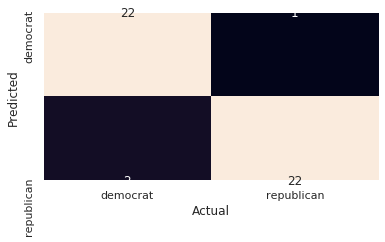

 
Metricas de Evaluacion 
Exactitud:  0.9362
Precision:  0.9167
Sensibilidad:  0.9565
F1: 0.9362
Precision en el set de Entrenamiento: 0.91
Precision en el set de Test: 0.94
 
Historigrama 


(array([24., 23.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

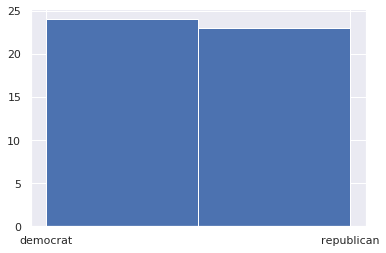

In [37]:
#Importacion de librerias
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Formato de texto
class txtformat:
    BOLD = '\033[1m'
    END = '\033[0m'

#Imprime con heatmap una matriz de confusion 'matrix' basándose en la prediccion pred
def printConfusionMatrix(pred, matrix):
    var_names = np.unique(test_prediction)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=var_names, yticklabels=var_names)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
    
###########################
# 1. Preparacion de datos #
###########################
#Importamos el dataset
data = pd.read_csv("house-votes-84.csv")

# Eliminamos todos los valores ? y convertimos cada valor en numerico
data = data.replace('?', np.nan)
data = data.dropna()
mapping = { "y": 1, "n" : 0}
data_x = data.iloc[:,1:17].replace(mapping)
data_y = data["Class Name"]

#Analisis de los datos
print(txtformat.BOLD, '\nAnalisis de los datos', txtformat.END)
print(data.groupby('Class Name').size())

# Echamos un vistazo al formato de nuestros datos
display(data.head(10))

##############################################
# 2. Creacion de datos de entrenamiento/test #
##############################################
# Dividimos los datos para entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data_x , data_y, test_size=0.2, random_state = 0)  

#Creamos el modelo y lo entrenamos
training_data = MultinomialNB().fit(x_train, y_train)   

##########################################
# 3. Creacion de features para el modelo #
##########################################
#Hacemos una prediccion sobre el conjunto de pruebas y generamos la matriz de confusion
test_prediction = training_data.predict(x_test)    
cm = confusion_matrix(y_test, test_prediction)

#Evaluamos nuestro modelo 
ct = pd.crosstab(y_test, test_prediction, rownames=['Actual'], colnames=['Predicted'],  margins=True)

print(txtformat.BOLD, '\nMatriz de Confusion', txtformat.END)
display (ct)
print (cm)
printConfusionMatrix(test_prediction, cm)

#Imprimimos las metricas de evaluacion del modelo
print(txtformat.BOLD, '\nMetricas de Evaluacion', txtformat.END)
print ('Exactitud:  {:.4f}'.format(accuracy_score(y_test,test_prediction)))
print ('Precision:  {:.4f}'.format(precision_score(y_test,test_prediction, pos_label='democrat')))
print ('Sensibilidad:  {:.4f}'.format(recall_score(y_test,test_prediction, pos_label='democrat')))
print ('F1: {:.4f}'.format(f1_score(y_test,test_prediction, pos_label='democrat')))
print('Precision en el set de Entrenamiento: {:.2f}'.format(training_data.score(x_train, y_train)))
print('Precision en el set de Test: {:.2f}'.format(training_data.score(x_test, y_test)))

#Mostramos el historigrama
print(txtformat.BOLD, '\nHistorigrama', txtformat.END)
plt.hist(test_prediction, bins = 2)